In [33]:
import matplotlib.pyplot as plt
import numpy as np
import copy as cp

In [64]:
sous_ensembles = {
    #"triangulaire" : [(0, 0), (1,0), (4,1), (6,0)],
   # "trapezoidal" : [(0, 0), (1,0), (4,1), (6,1), (8,0)],
    "random" : [(0, 0), (1,0), (4,1), (6,0.6), (7,0.3), (9,1), (10, 0.5), (15,0)],
}

In [28]:

def compute_membership(x, inflexion_points):
    for i in range(1, len(inflexion_points)):
        if x > inflexion_points[i][0]:
            continue
        else:
            m = (inflexion_points[i-1][1] - inflexion_points[i][1]) / (inflexion_points[i-1][0] - inflexion_points[i][0]) 
            b = inflexion_points[i][1] - m * inflexion_points[i][0]
            return m*x + b
        return 0
 
def compute_complement(inflexion_points):
    return [(inflexion_points[i][0], 1-inflexion_points[i][1]) for i in range(len(inflexion_points))]

[(0, 0), (1, 1)]

In [52]:
def calculerDegreeAppartenance(x, ens):
    inx = None
    pt_prec = None
    pt_suiv = None
    for i in range(len(ens)):
        if x > ens[i][0] and x<ens[i+1][0]:
            pt_suiv = cp.deepcopy(ens[i+1])
            pt_prec = cp.deepcopy(ens[i])
            break
    if not pt_prec or not pt_suiv:
        return 0
    y = np.array([pt_prec[1], pt_suiv[1]])
    k = np.array([[pt_prec[0], 1], [pt_suiv[0], 1]])
    res = np.linalg.solve(k,y)
    a, b = res[0], res[1]
    return a*x +b

In [54]:
calculerDegreeAppartenance(5, [(0, 0), (1,0), (4,1), (6,0.6), (7,0.3), (9,1), (10, 0.5), (15,0)])

0.7999999999999998

In [71]:
def visualisation(**kwargs):
    plt.figure()
    for key, value in kwargs.items():
        x = []
        y = []
        for pt in value:
            x.append(pt[0])
            y.append(pt[1])
        plt.plot(x, y, label=key)
        plt.legend(loc="upper right")

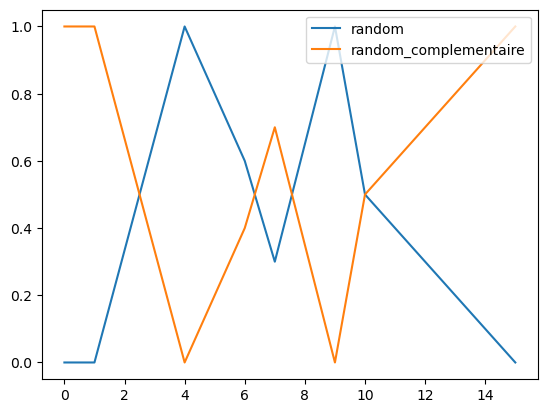

In [72]:
visualisation(**sous_ensembles)

In [57]:
def complementaire(ens):
    return [(x[0], 1-x[1]) for x in ens]

In [73]:
sous_ensembles["random_complementaire"] = complementaire(sous_ensembles["random"])

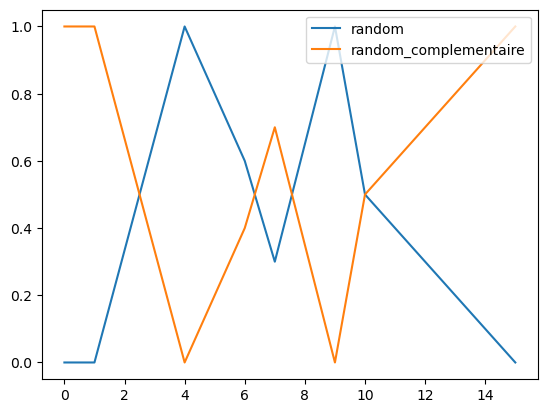

In [74]:
visualisation(**sous_ensembles)

In [82]:
class T():
     def hello(self, ens1, ens2):
        assert len(ens1) == len(ens2)
        ens = []
        for i in range(len(ens1)):
            assert ens1[i][0] == ens2[i][0] # check les x sont les memes
            ens.append((ens1[i][0], self.calculer(ens1[i][1], ens2[i][1])))
        return ens
     
class T_norm(T):
    def __init__(self, type="probabiliste"):
        self.type = type
    
    def calculer(self, x ,y):
        if self.type == "probabiliste":
            return x*y
        if self.type == "lukasiewicz":
            return max(x+y-1,0)
        if self.type == "zadeh":
            return min(x, y)
        if self.type == "hamacher":
            if x == y and x == 0:
                return 0
            return (x*y)/(x+y-x*y)
        if self.type == "drastique":
            if x == 1:
                return y
            if y == 1:
                return x
            return 0
    
class TCoNorm(T):
    def __init__(self, type="probabiliste"):
        self.type = type
 
    def calculer(self, x, y):
        if self.type == 'probabiliste':
            return x+y-x*y
        elif self.type == 'lukasiewicz':
            return np.min(x+y, 1)
        elif self.type == 'zadeh':
            return np.max(x,y)
        elif self.type == 'hamacher':
            return (x+y)/ (1+x*y)
        elif self.type == 'drastique':
            if x == 0:
                return y
            elif y == 0:
                return x
            else:
                return 1
        else:
            return None